In [15]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
import numpy as np

In [16]:
run = Flow('JaccardSimilarityFlow').latest_successful_run
print("Using run: %s" % str(run))

Using run: Run('JaccardSimilarityFlow/1590092958066282')


In [17]:
mapped_distances_df = run.data.mapped_distances_df
mapped_distances_df

,1133635,1133738,1222019,1253677,15338691814,15338777389,1552701,1912406,197414957,2016379,...,4530750,4849681,4927062,4952925,5889297,596810,793505,876425,885246,928908
1133635,1.000000,0.007042,0.067961,0.078313,0.077079,0.044379,0.003484,0.007042,0.083536,0.007042,...,0.071887,0.061657,0.058442,0.042755,0.167056,0.072483,0.089013,0.042232,0.054927,0.056166
1133738,0.007042,1.000000,0.001727,0.003745,0.003846,0.000000,0.636364,0.600000,0.001880,0.777778,...,0.001773,0.000000,0.004587,0.000000,0.002751,0.003795,0.001953,0.000000,0.005249,0.001684
1222019,0.067961,0.001727,1.000000,0.126012,0.083269,0.027638,0.000861,0.001727,0.143892,0.000863,...,0.106149,0.061848,0.070699,0.058871,0.124250,0.089902,0.103931,0.067531,0.070077,0.119048
1253677,0.078313,0.003745,0.126012,1.000000,0.088174,0.022300,0.003736,0.003745,0.145151,0.002494,...,0.109926,0.085279,0.063358,0.050494,0.114622,0.105793,0.124460,0.091155,0.090317,0.106400
15338691814,0.077079,0.003846,0.083269,0.088174,1.000000,0.075410,0.007663,0.007722,0.069331,0.003846,...,0.072848,0.073469,0.086651,0.104000,0.083426,0.067586,0.084406,0.063898,0.062606,0.086675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596810,0.072483,0.003795,0.089902,0.105793,0.067586,0.022298,0.001887,0.003795,0.107293,0.001894,...,0.086694,0.081744,0.057803,0.039634,0.108929,1.000000,0.115217,0.107948,0.103448,0.086275
793505,0.089013,0.001953,0.103931,0.124460,0.084406,0.017544,0.001946,0.003914,0.144217,0.001953,...,0.101660,0.089636,0.093130,0.043887,0.122711,0.115217,1.000000,0.106024,0.097257,0.096386
876425,0.042232,0.000000,0.067531,0.091155,0.063898,0.025210,0.000000,0.000000,0.084808,0.000000,...,0.076582,0.078616,0.046980,0.041742,0.082061,0.107948,0.106024,1.000000,0.283388,0.095290
885246,0.054927,0.005249,0.070077,0.090317,0.062606,0.029748,0.002604,0.002618,0.087253,0.002618,...,0.071264,0.071074,0.055856,0.046875,0.076621,0.103448,0.097257,0.283388,1.000000,0.116009


In [18]:
mapped_predictions_df  = run.data.mapped_predictions_df
mapped_predictions_df

,1133635,1133738,1222019,1253677,15338691814,15338777389,1552701,1912406,197414957,2016379,...,4530750,4849681,4927062,4952925,5889297,596810,793505,876425,885246,928908
1133635,"(True, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)","(False, True)","(False, True)","(False, True)"
1133738,"(False, True)","(True, True)","(False, True)","(False, False)","(False, False)","(False, False)","(True, False)","(True, True)","(False, True)","(True, False)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)","(False, True)","(False, True)","(False, True)"
1222019,"(False, True)","(False, True)","(True, True)","(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)","(False, True)","(False, True)","(False, True)"
1253677,"(False, False)","(False, False)","(False, False)","(True, True)","(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)",...,"(False, True)","(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)","(False, False)","(False, False)","(False, False)"
15338691814,"(False, False)","(False, False)","(False, False)","(False, True)","(True, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)",...,"(False, True)","(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)","(False, False)","(False, False)","(False, False)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596810,"(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(True, True)","(False, False)","(False, True)","(False, True)","(False, True)"
793505,"(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)",...,"(False, True)","(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(True, True)","(False, False)","(False, False)","(False, False)"
876425,"(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)","(True, True)","(False, True)","(False, True)"
885246,"(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)","(False, True)","(True, True)","(False, True)"


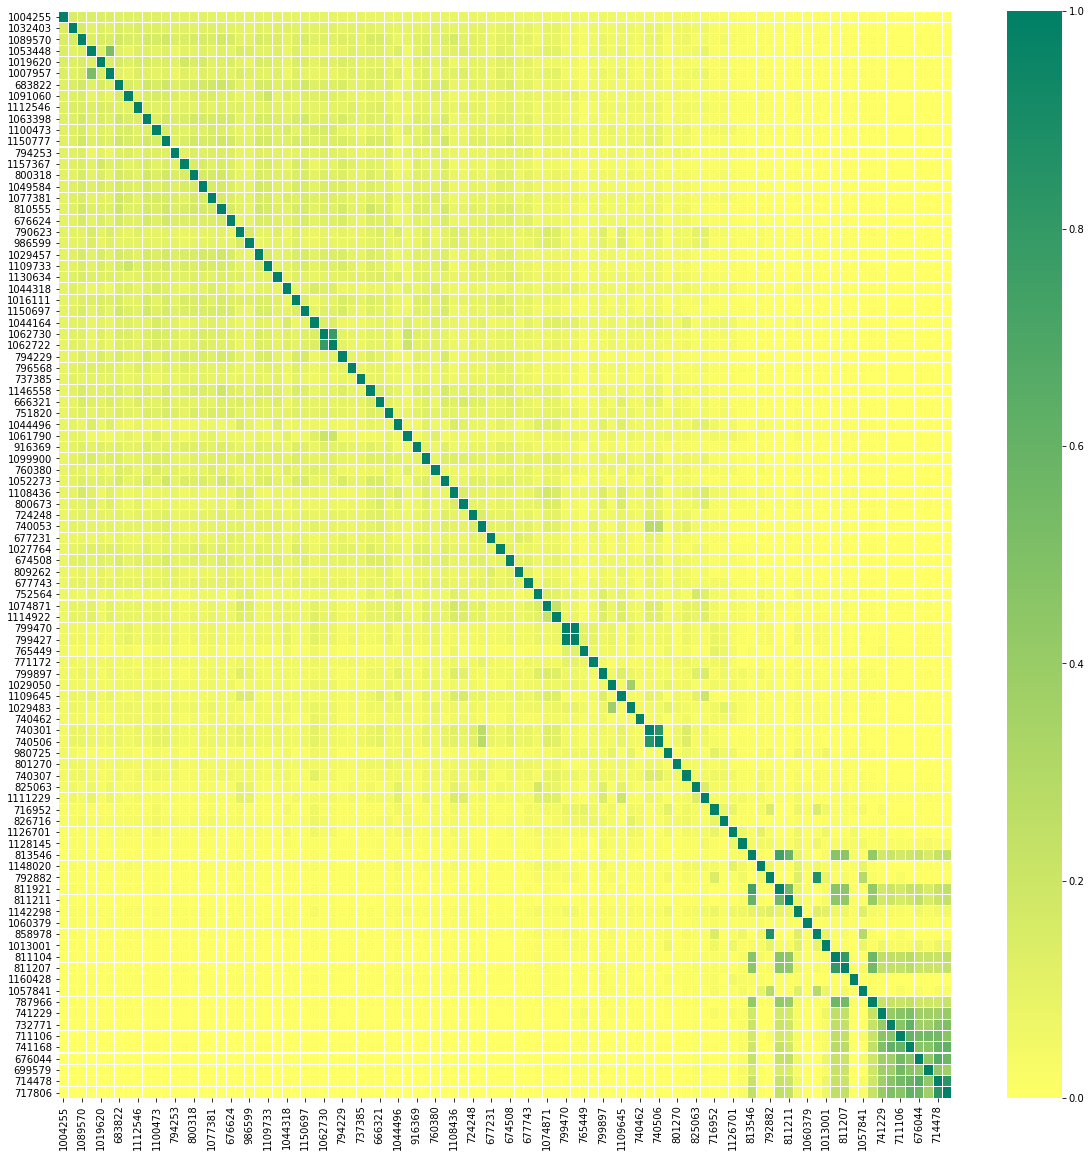

In [8]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(mapped_distances_df, cmap='summer_r', linewidths=0.01)

# 4. Evaluation

## 4.1 Time Consumed

In [4]:
# TO DO 

/home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 2min 55s, sys: 950 ms, total: 2min 56s
Wall time: 2min 56s


## 4.2 Similarities Surface
 If we analyses the similarities as if it was a surface we can measure how smooth they change. If the smoothness is high, the less informative the algorithm is to differentiate documents

In [19]:
result = ndimage.laplace(mapped_distances_df.to_numpy())
surface_roughness = np.average(np.absolute(result))
print("Surface Smoothness(0 to 1): ", 1 - surface_roughness)

Surface Smoothness(0 to 1):  0.7930335112007022


## Using Similarities To Classify

In [20]:
predictions_matrix = mapped_predictions_df.to_numpy()

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
count = 0
for i in range(1, len(predictions_matrix)):
    for j in range(i, len(predictions_matrix)):
        count += 1
        similarity_prediction, true_class = predictions_matrix[i][j]
        if similarity_prediction == true_class:
            if similarity_prediction:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if similarity_prediction:
                false_positive += 1
            else:
                false_negative += 1

accuracy = (true_positive + true_negative)/(true_positive + false_positive + true_negative + false_positive)
precision = true_positive/(true_positive + false_positive)
recall = true_positive/(true_positive + false_negative)
f1_score = 2*(recall * precision)/(recall+precision)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Accuracy:  0.98586017282011
Precision:  0.8928571428571429
Recall:  0.0583203732503888
F1 Score:  0.1094890510948905


# 5. Bibliography

Overview of Text Similarity Metrics in Python. Sanket Gupta. [Available at](https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50) Last visited: 24/04/2020 